In [1]:
# Function to apply styling
def style_dataframe(df):
    return df.style.set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#334257'), ('color', 'white'), ('font-family', 'Helvetica'), ('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('font-family', 'Helvetica'), ('font-size', '14px'), ('color', '#121212')]},
        {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#e8e8e8')]},
        {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
        {'selector': 'tr:hover', 'props': [('background-color', '#bbc7ce')]},
        {'selector': 'table', 'props': [('border-collapse', 'separate'), ('border-spacing', '0 10px')]}
    ])

## First dataframe

In [2]:
import pandas as pd
import evaluation_results as ev_r
import utility.metrics as m

# Creating DataFrame for Benchmarks 1
data1 = {
    "Compression Method": ["Dynamic Range", "Full Integer", "Float 16"],
    "Validation PSNR (dB)": [ev_r.drq_val_avg_psnr, ev_r.fiq_val_avg_psnr, ev_r.f16q_val_avg_psnr],  
    "Testing PSNR (dB)": [ev_r.drq_test_avg_psnr, ev_r.fiq_test_avg_psnr, ev_r.f16q_test_avg_psnr],  
    "Validation SSIM": [ev_r.drq_val_avg_ssim, ev_r.fiq_val_avg_ssim, ev_r.f16q_val_avg_ssim],       
    "Testing SSIM": [ev_r.drq_test_avg_ssim, ev_r.fiq_test_avg_ssim, ev_r.f16q_test_avg_ssim],       
    "Size (MB)": [m.get_file_size_in_mb_for('compressed_models/esrgan_drq.tflite'),
                  m.get_file_size_in_mb_for('compressed_models/esrgan_fiq.tflite'),
                  m.get_file_size_in_mb_for('compressed_models/esrgan_f16q.tflite')],
    "Compression Ratio": [f"{m.get_compression_ratio_for('compressed_models/esrgan_drq.tflite'):.2f}%",
                          f"{m.get_compression_ratio_for('compressed_models/esrgan_fiq.tflite'):.2f}%",
                          f"{m.get_compression_ratio_for('compressed_models/esrgan_f16q.tflite'):.2f}%"]
}

df1 = pd.DataFrame(data1)

styled_df1 = style_dataframe(df1)

styled_df1

Path to model files: C:\Users\darks\.cache\kagglehub\models\kaggle\esrgan-tf2\tensorFlow2\esrgan-tf2\1




C:\a_Skola\ImageSuperResolution\python\ESRGAN\venv\Lib\site-packages\tensorflow\lite\python\convert.py:964: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Full Integer Quantization benchmarking results:
Average Validation PSNR score: 26.301798612605708, Average Validation SSIM score: 0.7694588981453465
Average Testing PSNR score: 21.89055418239448, Average Testing SSIM score: 0.6424607778889415
Dynamic Range Quantization benchmarking results:
Average Validation PSNR score: 27.042957494380467, Average Validation SSIM score: 0.8067752382464828
Average Testing PSNR score: 22.294221310056663, Average Testing SSIM score: 0.672515171615486
Float 16 Quantization benchmarking results:
Average Validation PSNR score: 27.071217846559875, Average Validation SSIM score: 0.8093096176206642
Average Testing PSNR score: 22.301541551140623, Average Testing SSIM score: 0.674006592677572
The size of the file is: 4881824 bytes
The size of the file is: 5023800 bytes
The size of the file is: 9436428 bytes


,Compression Method,Validation PSNR (dB),Testing PSNR (dB),Validation SSIM,Testing SSIM,Size (MB),Compression Ratio
0,Dynamic Range,27.042957,22.294221,0.806775,0.672515,4.655670,77.38%
1,Full Integer,26.301799,21.890554,0.769459,0.642461,4.791069,76.72%
2,Float 16,27.071218,22.301542,0.809310,0.674007,8.999279,56.28%


## Second dataframe

In [3]:
import benchmark_interface as bm
import utility.methods as methods
bm.benchmark(methods.quantization_strategies)

# Creating DataFrame for Android tablet device
data2 = {
    "Device": ["TS9+", "S10+", "TS9+", "S10+", "TS9+", "S10+"],
    "Method": ["DRQ", "DRQ", "FIQ", "FIQ", "FL16", "FL16"],
    "Average CPU Inference Time (ms)": [
        bm.records[0]['CPU time (ms)'],
        bm.records[3]['CPU time (ms)'],
        bm.records[2]['CPU time (ms)'],
        bm.records[5]['CPU time (ms)'],
        bm.records[1]['CPU time (ms)'],
        bm.records[4]['CPU time (ms)']
    ]
}
df2 = pd.DataFrame(data2)

styled_df2 = style_dataframe(df2)

styled_df2

ADB log buffer cleared for device R52WA0GP2MM.
Running command: adb -s R52WA0GP2MM shell am start -S -n org.tensorflow.lite.benchmark/.BenchmarkModelActivity --es args \"--graph=/data/local/tmp/esrgan_drq.tflite --num_threads=4 --num_runs=1\"
ADB log buffer cleared for device R52WA0GP2MM.
Running command: adb -s R52WA0GP2MM shell am start -S -n org.tensorflow.lite.benchmark/.BenchmarkModelActivity --es args \"--graph=/data/local/tmp/esrgan_f16q.tflite --num_threads=4 --num_runs=1\"
ADB log buffer cleared for device R52WA0GP2MM.
Running command: adb -s R52WA0GP2MM shell am start -S -n org.tensorflow.lite.benchmark/.BenchmarkModelActivity --es args \"--graph=/data/local/tmp/esrgan_fiq.tflite --num_threads=4 --num_runs=1\"
ADB log buffer cleared for device 192.168.8.120:43991.
Running command: adb -s 192.168.8.120:43991 shell am start -S -n org.tensorflow.lite.benchmark/.BenchmarkModelActivity --es args \"--graph=/data/local/tmp/esrgan_drq.tflite --num_threads=4 --num_runs=1\"
ADB log buf

,Device,Method,Average CPU Inference Time (ms)
0,TS9+,DRQ,3972.950000
1,S10+,DRQ,1943.440000
2,TS9+,FIQ,5.371910
3,S10+,FIQ,3.582830
4,TS9+,FL16,5.457360
5,S10+,FL16,3.690320


## Save dataframes as png's

In [4]:
import dataframe_image as dfi

dfi.export(styled_df1, 'results/styled_dataframe1.png', table_conversion='matplotlib', dpi=300)
dfi.export(styled_df2, 'results/styled_dataframe2.png', table_conversion='matplotlib', dpi=300)

## Create seaborn graph

C:\Users\darks\AppData\Local\Temp\ipykernel_20532\75632213.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x="Device + Quantization Technique", y="Average CPU Inference Time (ms)", data=df2, palette='dark')


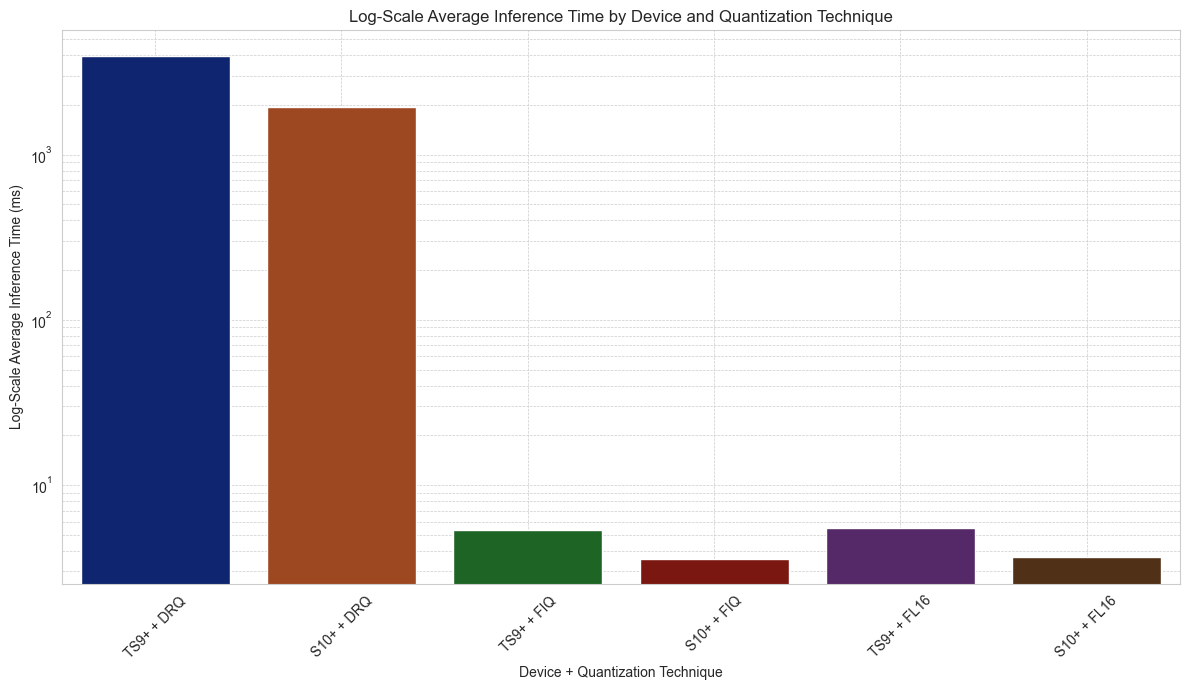

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df2['Device + Quantization Technique'] = df2['Device'] + " + " + df2['Method']

plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(x="Device + Quantization Technique", y="Average CPU Inference Time (ms)", data=df2, palette='dark')

plt.yscale('log')

plt.title('Log-Scale Average Inference Time by Device and Quantization Technique')
plt.xlabel('Device + Quantization Technique')
plt.ylabel('Log-Scale Average Inference Time (ms)')
plt.xticks(rotation=45)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig('results/cpu_time.png', dpi=300)

plt.show()

## Visual comparison using float 16

In [6]:
from skimage import io
import numpy as np
import PIL.Image
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path='compressed_models/esrgan_f16q.tflite')
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

low_res_path = "datasets/validation_dataset/low_res_63.png"
ground_truth_path = "datasets/validation_dataset/ground_truth_63.png"

# Load and process low-resolution image
low_res_image = io.imread(low_res_path)
low_res_image = PIL.Image.fromarray(low_res_image)
low_res_image = low_res_image.resize((128, 128), PIL.Image.BICUBIC)
low_res_image = np.array(low_res_image, dtype=np.float32)
low_res_image = np.expand_dims(low_res_image, axis=0)

# Perform inference
interpreter.set_tensor(input_details[0]['index'], low_res_image)
interpreter.invoke()
output_image = interpreter.tensor(output_details[0]['index'])()
output_image = np.clip(output_image.squeeze(), 0, 255).astype(np.uint8)

# Prepare images for comparison
super_resolution_img = PIL.Image.fromarray(output_image, 'RGB')
super_resolution_img = super_resolution_img.resize((512, 512))
down_sampled_image = PIL.Image.open(low_res_path).resize((512, 512))
ground_truth_image = PIL.Image.open(ground_truth_path).resize((512, 512))

# Function to concatenate images horizontally
def get_concat_h(im1, im2):
    dst = PIL.Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

# Concatenate and display images
combined_image_1 = get_concat_h(down_sampled_image, super_resolution_img)
combined_image_1.show()
combined_image_1.save("results/lr_sr.png")

combined_image_2 = get_concat_h(ground_truth_image, super_resolution_img)
combined_image_2.show()
combined_image_2.save("results/hr_sr.png")